In [1]:
# Step 2 -----EDA

In [1]:
# Inputs Path

%cd C:\Users\RK16WO\ING_Project\SAS_Viya_Demo
    

C:\Users\RK16WO\ING_Project\SAS_Viya_Demo


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Stratified_Sample.csv')
df.head()


,trkid,scan_iorg_nbr,first_scan,last_scan,trailer_number,cba_shipper_number,service_code,next_load_point,dest_iorg_nbr,sort_id,...,dispatch_time_gmt,arrival_time_gmt,trip_leg_seq_arrival,facility_number_y,trip_leg_seq_site,site_seq,ROUTE_ORDER,departure_time_gmt,SPOT_NAME,avg_packages_per_day
0,4.049250e+13,389,0,1/19/2019 1:54,825985,404924,SO019,371,379,5231147,...,1/18/2019 18:08,1/18/2019 19:51,49093916,386,49093075,272568,1,1/18/2019 18:49,SYNNEX (SOUTHAVEN),500
1,4.712600e+11,389,0,1/11/2019 2:00,806905,5251373,SO850,219,3229,4230812,...,1/10/2019 15:28,1/10/2019 17:35,48960574,386,48960241,247154,1,1/10/2019 15:58,"BOUNDTREE MEDICAL ""RETURNS""",250
2,4.934750e+14,389,0,1/10/2019 18:51,826016,4934751,SO019,406,430,4173324,...,1/9/2019 16:52,1/9/2019 17:11,48940200,386,48940058,231509,1,1/9/2019 17:01,TECHNICOLOR RTN (SINGLE),1000
3,4.257990e+11,389,0,1/16/2019 20:49,831651,5247996,SO019,604,466,3173717,...,1/11/2019 18:46,1/11/2019 20:10,48984998,386,48983941,247153,1,1/11/2019 19:31,FUTURE ELECTRONICS (RETURNS),250
4,1.325880e+14,644,0,1/15/2019 15:29,840647,1325875,SO019,642,642,2130055,...,1/18/2019 18:43,1/18/2019 19:43,49094409,643,49093758,3189,1,1/18/2019 19:10,HALLMARK - LIBERTY,900


In [4]:
#df.dtypes
df.shape

(21086, 49)

In [5]:
s_df=df[['package_type', 'origin', 'pkg_weight', 'pkg_length', 'pkg_width', 'pkg_height','pkg_cube', 
         'MANUFACTURER','gvwr','trailer_length','trailer_width', 'trailer_height', 'trip_type',       
         'sort_name', 'total_packages', 'ROUTE_ORDER', 'avg_packages_per_day']]
#s_df.dtypes
#s_df.nunique()

In [6]:
# How much data is missing for each variables?
percent_missing = s_df.isnull().sum() * 100 / len(s_df)
percent_missing

package_type            0.000000
origin                  0.000000
pkg_weight              0.000000
pkg_length              3.988428
pkg_width               3.988428
pkg_height              3.988428
pkg_cube                0.000000
MANUFACTURER            0.000000
gvwr                    0.000000
trailer_length          0.000000
trailer_width           0.000000
trailer_height          0.251352
trip_type               0.000000
sort_name               0.000000
total_packages          0.000000
ROUTE_ORDER             0.000000
avg_packages_per_day    0.000000
dtype: float64

In [7]:
# Imputing the missing values by uing

#s_df["pkg_length"].fillna(s_df.groupby("package_type")["pkg_length"].transform("median"), inplace=True)
#s_df["pkg_width"].fillna(s_df.groupby("package_type")["pkg_width"].transform("median"), inplace=True)
#s_df["pkg_height"].fillna(s_df.groupby("package_type")["pkg_height"].transform("median"), inplace=True)
#s_df["trailer_height"].fillna(s_df["trailer_height"].median(), inplace=True)

# Creating the indicator column in my data frame which shows me if values are missing in other columns. 

import numpy as np
s_df['indicator']=np.select([s_df.pkg_length.isnull(),s_df.pkg_width.isnull(),
                           s_df.pkg_height.isnull(), s_df.trailer_height.isnull()],[2,3,4,5],1)



In [8]:
s_df[["pkg_length","pkg_width", "pkg_height","trailer_height", "indicator"]].head()

,pkg_length,pkg_width,pkg_height,trailer_height,indicator
0,18.0,13.5,11.0,162.0,1
1,16.2,15.8,15.4,117.0,1
2,16.0,10.2,5.8,162.0,1
3,31.6,18.4,15.7,117.0,1
4,53.4,10.8,10.4,117.0,1


In [9]:
s_df.dtypes

package_type             object
origin                    int64
pkg_weight              float64
pkg_length              float64
pkg_width               float64
pkg_height              float64
pkg_cube                float64
MANUFACTURER             object
gvwr                      int64
trailer_length            int64
trailer_width             int64
trailer_height          float64
trip_type                object
sort_name                object
total_packages            int64
ROUTE_ORDER               int64
avg_packages_per_day      int64
indicator                 int32
dtype: object

In [10]:
# Separating the Numerical Variables
num_df=s_df.select_dtypes(include=['int32','int64', 'float64']).copy()
num_df.head()

,origin,pkg_weight,pkg_length,pkg_width,pkg_height,pkg_cube,gvwr,trailer_length,trailer_width,trailer_height,total_packages,ROUTE_ORDER,avg_packages_per_day,indicator
0,386,19.10,18.0,13.5,11.0,1.546875,40000,336,102,162.0,0,1,500,1
1,386,13.70,16.2,15.8,15.4,2.281125,40000,336,102,117.0,0,1,250,1
2,386,4.60,16.0,10.2,5.8,0.547778,40000,336,102,162.0,0,1,1000,1
3,386,36.70,31.6,18.4,15.7,5.282759,40000,336,102,117.0,0,1,250,1
4,643,17.28,53.4,10.8,10.4,3.471000,40000,336,102,117.0,1711,1,900,1


In [11]:
# Generating the Summary statistics
num_df.describe()

,origin,pkg_weight,pkg_length,pkg_width,pkg_height,pkg_cube,gvwr,trailer_length,trailer_width,trailer_height,total_packages,ROUTE_ORDER,avg_packages_per_day,indicator
count,21086.000000,21086.000000,20245.000000,20245.000000,20245.000000,21086.000000,21086.000000,21086.000000,21086.000000,21033.000000,21086.000000,21086.000000,21086.000000,21086.000000
mean,504.295362,13.292637,20.743082,13.021561,8.304594,1.508243,45135.729868,408.783079,101.999431,136.482908,313.479370,1.006260,468.771223,1.049938
std,159.597455,15.292118,13.358021,5.345974,3.940625,1.787507,12472.386462,128.603356,0.023850,25.675874,516.792904,0.078874,313.629594,0.278586
min,60.000000,0.010000,1.000000,1.000000,0.400000,0.000579,0.000000,328.000000,101.000000,105.000000,0.000000,1.000000,0.000000,1.000000
25%,386.000000,2.600000,13.000000,9.600000,5.400000,0.432870,39000.000000,336.000000,102.000000,110.000000,0.000000,1.000000,200.000000,1.000000
50%,643.000000,7.575000,17.000000,12.200000,7.600000,0.940093,40000.000000,336.000000,102.000000,117.000000,100.000000,1.000000,400.000000,1.000000
75%,643.000000,18.400000,23.000000,15.400000,10.800000,1.952760,40000.000000,336.000000,102.000000,162.000000,300.000000,1.000000,500.000000,1.000000
max,644.000000,150.000000,107.400000,49.600000,31.000000,27.524556,70000.000000,636.000000,102.000000,164.000000,5000.000000,2.000000,2700.000000,5.000000


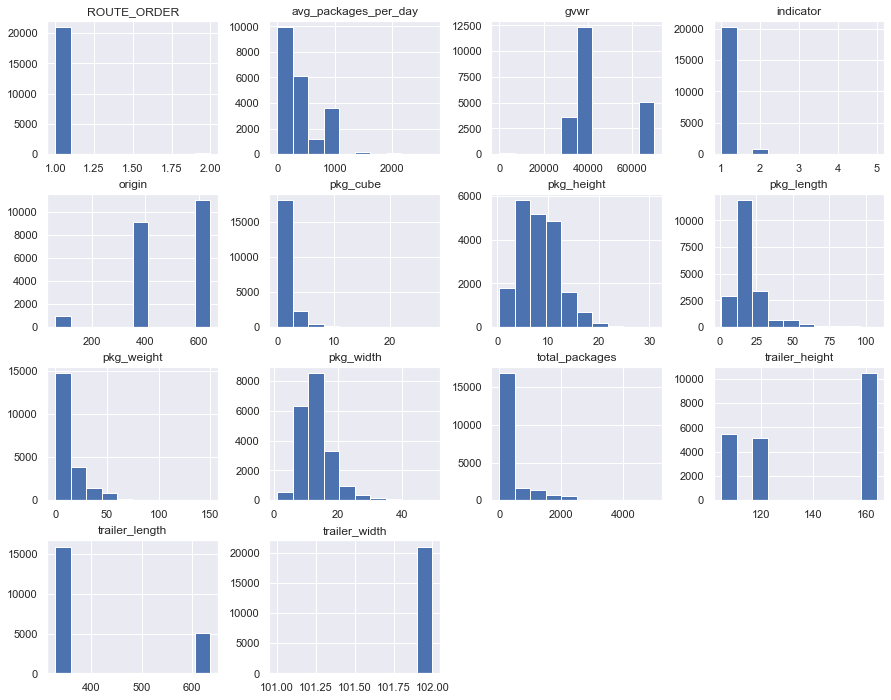

In [96]:
#num_df.hist(bins=8)
#plt.figure(figsize=(15,15))

fig = plt.figure(figsize = (15,12))
ax = fig.gca()
num_df.hist(ax=ax)
plt.show()


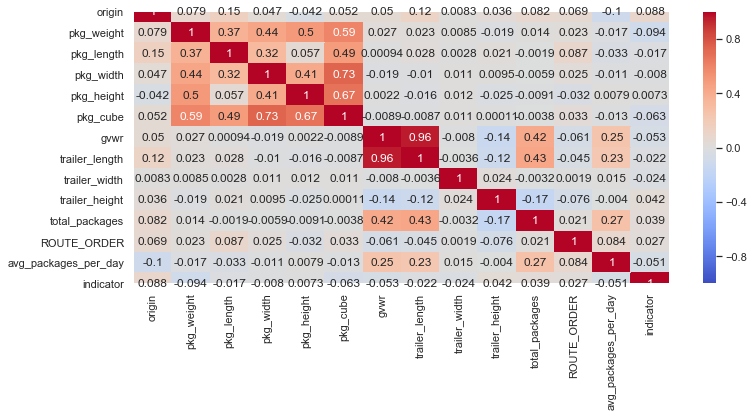

In [97]:
# generating correlation heatmap 
#sns.heatmap(s_df.corr(), annot = True) 
#s_df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(num_df.corr(), vmin=-1,cmap='coolwarm', annot=True);


In [12]:
# Separating the Categorical Variables
cat_df = s_df.select_dtypes(include=['object']).copy()
cat_df.nunique()
cat_df.head()

,package_type,MANUFACTURER,trip_type,sort_name
0,REG,KENTUCKY,LH,MID
1,REG,HYUNDAI,LH,MID
2,REG,KENTUCKY,LH,TWI
3,REG,HYUNDAI,LH,TWI
4,NC,HYUNDAI,LH,DAY


In [ ]:
# 3. Classification Problem

In [13]:
# Target Variable(package_type) distribution
s_df['package_type'] = s_df.package_type.map({'NC':0, 'REG':1, 'SML':2})

[Text(0, 0.5, 'samples'), Text(0.5, 1.0, 'package_type class distribution')]

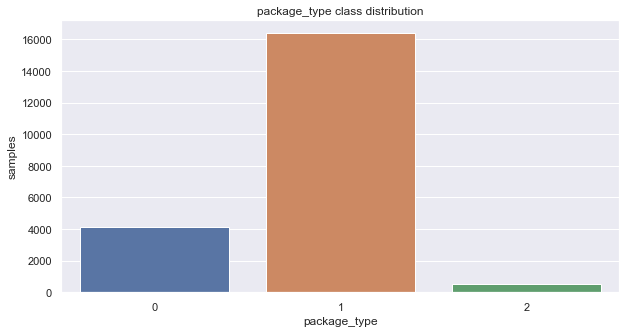

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=s_df, x=s_df.package_type)
ax.set(ylabel='samples',title="package_type class distribution")

In [15]:
y=s_df[['package_type']]

In [16]:
cat_df.head()

,package_type,MANUFACTURER,trip_type,sort_name
0,REG,KENTUCKY,LH,MID
1,REG,HYUNDAI,LH,MID
2,REG,KENTUCKY,LH,TWI
3,REG,HYUNDAI,LH,TWI
4,NC,HYUNDAI,LH,DAY


In [17]:
del cat_df['package_type']

In [18]:
#cat_df.head()

cat_df.nunique()

MANUFACTURER    6
trip_type       2
sort_name       4
dtype: int64

In [19]:
dummy_df=pd.get_dummies(cat_df, drop_first=True)

In [20]:
dummy_df.head()

,MANUFACTURER_HYUNDAI,MANUFACTURER_KENTUCKY,MANUFACTURER_STOUGHTON,MANUFACTURER_VANGUARD,MANUFACTURER_WABASH NATIONAL,trip_type_PD,sort_name_MID,sort_name_SUN,sort_name_TWI
0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0


In [21]:
# Independent Dataset
X=pd.concat([num_df, dummy_df], axis=1)


In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
X.head()

,origin,pkg_weight,pkg_length,pkg_width,pkg_height,pkg_cube,gvwr,trailer_length,trailer_width,trailer_height,...,indicator,MANUFACTURER_HYUNDAI,MANUFACTURER_KENTUCKY,MANUFACTURER_STOUGHTON,MANUFACTURER_VANGUARD,MANUFACTURER_WABASH NATIONAL,trip_type_PD,sort_name_MID,sort_name_SUN,sort_name_TWI
0,386,19.10,18.0,13.5,11.0,1.546875,40000,336,102,162.0,...,1,0,1,0,0,0,0,1,0,0
1,386,13.70,16.2,15.8,15.4,2.281125,40000,336,102,117.0,...,1,1,0,0,0,0,0,1,0,0
2,386,4.60,16.0,10.2,5.8,0.547778,40000,336,102,162.0,...,1,0,1,0,0,0,0,0,0,1
3,386,36.70,31.6,18.4,15.7,5.282759,40000,336,102,117.0,...,1,1,0,0,0,0,0,0,0,1
4,643,17.28,53.4,10.8,10.4,3.471000,40000,336,102,117.0,...,1,1,0,0,0,0,0,0,0,0


In [24]:
X.fillna(999, inplace=True)
X.head()

,origin,pkg_weight,pkg_length,pkg_width,pkg_height,pkg_cube,gvwr,trailer_length,trailer_width,trailer_height,...,indicator,MANUFACTURER_HYUNDAI,MANUFACTURER_KENTUCKY,MANUFACTURER_STOUGHTON,MANUFACTURER_VANGUARD,MANUFACTURER_WABASH NATIONAL,trip_type_PD,sort_name_MID,sort_name_SUN,sort_name_TWI
0,386,19.10,18.0,13.5,11.0,1.546875,40000,336,102,162.0,...,1,0,1,0,0,0,0,1,0,0
1,386,13.70,16.2,15.8,15.4,2.281125,40000,336,102,117.0,...,1,1,0,0,0,0,0,1,0,0
2,386,4.60,16.0,10.2,5.8,0.547778,40000,336,102,162.0,...,1,0,1,0,0,0,0,0,0,1
3,386,36.70,31.6,18.4,15.7,5.282759,40000,336,102,117.0,...,1,1,0,0,0,0,0,0,0,1
4,643,17.28,53.4,10.8,10.4,3.471000,40000,336,102,117.0,...,1,1,0,0,0,0,0,0,0,0


In [25]:
# USING RANDOM FOREST FOR FEATURE SELECTION
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [26]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)

# Fitting the classifier
rfc.fit(X, y)

# Printing the name of each feature along with the gini value
for feature in zip(X.columns, rfc.feature_importances_):
    print(feature)

('origin', 0.025453215588790483)
('pkg_weight', 0.10169031649846069)
('pkg_length', 0.30439607278257624)
('pkg_width', 0.1270419574310706)
('pkg_height', 0.13272495432520945)
('pkg_cube', 0.12122080782117546)
('gvwr', 0.02358209789120402)
('trailer_length', 0.004900417943543619)
('trailer_width', 0.0001508896998088854)
('trailer_height', 0.02181625272181313)
('total_packages', 0.041321767532139175)
('ROUTE_ORDER', 0.004701170773903403)
('avg_packages_per_day', 0.024610990805024345)
('indicator', 0.022766721942642634)
('MANUFACTURER_HYUNDAI', 0.008881045841844352)
('MANUFACTURER_KENTUCKY', 0.002921983115892265)
('MANUFACTURER_STOUGHTON', 0.003474662691949309)
('MANUFACTURER_VANGUARD', 0.00021351654593466197)
('MANUFACTURER_WABASH NATIONAL', 0.0019283731984013174)
('trip_type_PD', 0.0046139575101135305)
('sort_name_MID', 0.01042724966198389)
('sort_name_SUN', 0.002164468961562758)
('sort_name_TWI', 0.00899710871495576)


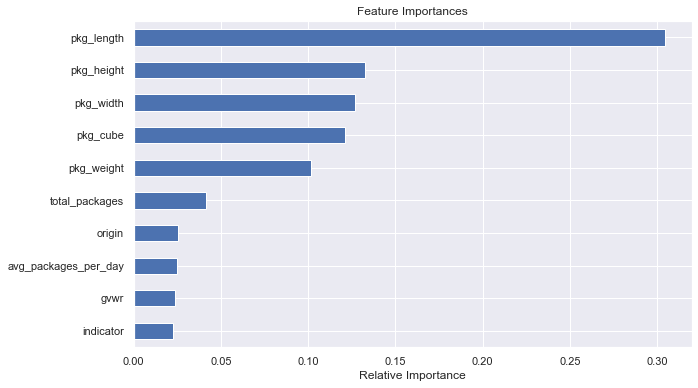

In [27]:
# Plotting top 10 feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importances')   
plt.xlabel('Relative Importance')   

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values()
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.show()



In [28]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.02)
sfm.fit(X, y)

# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

origin
pkg_weight
pkg_length
pkg_width
pkg_height
pkg_cube
gvwr
trailer_height
total_packages
avg_packages_per_day
indicator


In [29]:
X_imp=X[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','origin', 
         'pkg_cube','gvwr','trailer_height','total_packages', 'avg_packages_per_day', 'indicator' ]]
X_imp.head()

,pkg_weight,pkg_length,pkg_width,pkg_height,origin,pkg_cube,gvwr,trailer_height,total_packages,avg_packages_per_day,indicator
0,19.10,18.0,13.5,11.0,386,1.546875,40000,162.0,0,500,1
1,13.70,16.2,15.8,15.4,386,2.281125,40000,117.0,0,250,1
2,4.60,16.0,10.2,5.8,386,0.547778,40000,162.0,0,1000,1
3,36.70,31.6,18.4,15.7,386,5.282759,40000,117.0,0,250,1
4,17.28,53.4,10.8,10.4,643,3.471000,40000,117.0,1711,900,1


In [30]:
F_df=pd.concat([X_imp, y], axis=1)
F_df.head()

,pkg_weight,pkg_length,pkg_width,pkg_height,origin,pkg_cube,gvwr,trailer_height,total_packages,avg_packages_per_day,indicator,package_type
0,19.10,18.0,13.5,11.0,386,1.546875,40000,162.0,0,500,1,1
1,13.70,16.2,15.8,15.4,386,2.281125,40000,117.0,0,250,1,1
2,4.60,16.0,10.2,5.8,386,0.547778,40000,162.0,0,1000,1,1
3,36.70,31.6,18.4,15.7,386,5.282759,40000,117.0,0,250,1,1
4,17.28,53.4,10.8,10.4,643,3.471000,40000,117.0,1711,900,1,0


In [31]:
# Building the Model and importing the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y,test_size=0.20, random_state = 0, stratify=y)

In [33]:

# Applying SMOTE for Balancing the Design:
# You might need to install imblearn package from your Anconda prompt as follows
#conda install -c conda-forge imbalanced-learn

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

#np.bincount(y_train)

In [34]:
 
y_trainDF=pd.DataFrame(y_train, columns=['package_type']) 


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'package_type'),
 Text(0.5, 1.0, 'After SMOTE')]

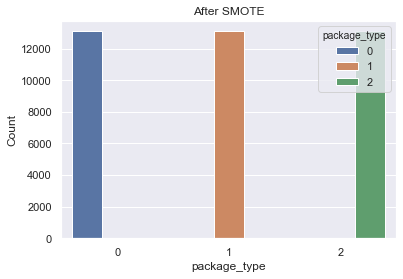

In [35]:
# After SMOTE

ax = sns.countplot(x="package_type", hue="package_type", data=y_trainDF)
ax.set(xlabel='package_type', ylabel='Count', title='After SMOTE')

In [122]:
# 1. Fitting the Multinomial Logistic Regression

lr = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy_score of LR is ', accuracy_score(y_test, y_pred))

Accuracy_score of LR is  0.7629208155523945


In [123]:
# 2. Fitting the Decision Tree
Dt=DecisionTreeClassifier()
Dt.fit(X_train, y_train)
y_pred = Dt.predict(X_test)

print('Accuracy_score of DT is ', accuracy_score(y_test, y_pred))

Accuracy_score of DT is  0.9075391180654339


In [36]:
#3. Fitting the Random Forest

Rf=RandomForestClassifier()
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)

print('Accuracy_score of RF is ', accuracy_score(y_test, y_pred))

Accuracy_score of RF is  0.9459459459459459


In [125]:
# 4. Fitting the Gradient Boosting
Gb=GradientBoostingClassifier()
Gb.fit(X_train, y_train)
y_pred = Gb.predict(X_test)

print('Accuracy_score of GB is ', accuracy_score(y_test, y_pred))

Accuracy_score of GB is  0.8928402086296823


In [ ]:
# 1 Accuracy_score of LR is  0.76
# 2 Accuracy_score of DT is  0.90
# 3 Accuracy_score of RF is  0.94
# 4 Accuracy_score of GB is  0.89

# We are choosing the RF algorithm for fitting the data, since the RF model gives the 
# highest Accuracy score compared to other models

In [145]:
#Final Model is Random Forest

Rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [167]:
# Comparing actual & predicted package types
y_hats = Rf.predict(X_test)

y_hats  = pd.DataFrame(y_hats)

df_out = X_test.reset_index()
df_out["Actual_PackageType"] = y_test.reset_index()["package_type"]
df_out["Prediction_PackageType"] = y_hats.reset_index()[0]



In [168]:
df_out.shape

(4218, 14)

In [169]:
df_out.head()

,index,pkg_weight,pkg_length,pkg_width,pkg_height,origin,pkg_cube,gvwr,trailer_height,total_packages,avg_packages_per_day,indicator,Actual_PackageType,Prediction_PackageType
0,16634,10.7,24.0,9.8,9.4,386,1.279444,40000,117.0,1000,400,1,1,1
1,17464,4.4,13.4,11.4,7.4,386,0.654181,40000,117.0,0,250,1,1,1
2,141,15.1,17.6,16.4,14.4,386,2.405333,39000,162.0,999,1000,1,1,1
3,20645,30.4,20.1,16.4,16.2,643,3.090375,68000,162.0,1712,1000,1,0,0
4,9633,14.3,14.4,11.6,10.2,61,0.986000,68000,110.0,998,0,1,1,1


In [170]:
# Exporting file
df_out.to_excel('Comparision_File.xlsx')

In [ ]:
# Importing the new test dataset for scoring

In [ ]:
# Preparing Test1_Dataset

In [54]:
Test1_FD=pd.read_csv("Test1.csv")
Test1_FD= Test1_FD[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','package_type','origin', 'pkg_cube','gvwr',
          'trailer_height','total_packages', 'avg_packages_per_day' ]]

# Target Variable(package_type) mapping
Test1_FD['package_type'] = Test1_FD.package_type.map({'NC':0, 'REG':1, 'SML':2})

# Creating the indicator column in my data frame which shows me if values are missing in other columns. 

Test1_FD['indicator']=np.select([Test1_FD.pkg_length.isnull(),Test1_FD.pkg_width.isnull(),
                           Test1_FD.pkg_height.isnull(), Test1_FD.trailer_height.isnull()],[2,3,4,5],1)
Test1_FD.fillna(999, inplace=True)
Test1_FD.head()
Test1=Test1_FD[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','origin','pkg_cube', 
                'gvwr','trailer_height','total_packages', 'avg_packages_per_day','indicator' ]]
Test1.head()

In [68]:
# Comparing actual & predicted package types
y_hats_T1 = Rf.predict(Test1)

y_hats_T1  = pd.DataFrame(y_hats_T1)

df_T1 = Test1.reset_index()
df_T1["Actual_PackageType"] = Test1_FD["package_type"]
df_T1["Prediction_PackageType"] = y_hats_T1.reset_index()[0]

# Exporting file
df_T1.to_excel('Predicted_output/Python_Test_outputs/Test1_Py_output.xlsx')

In [ ]:
# Preparing Test2_Dataset

In [70]:

Test2_FD=pd.read_csv("Test2.csv")
Test2_FD= Test2_FD[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','package_type','origin', 'pkg_cube','gvwr',
          'trailer_height','total_packages', 'avg_packages_per_day' ]]

# Target Variable(package_type) mapping
Test2_FD['package_type'] = Test2_FD.package_type.map({'NC':0, 'REG':1, 'SML':2})

# Creating the indicator column in my data frame which shows me if values are missing in other columns. 

Test2_FD['indicator']=np.select([Test2_FD.pkg_length.isnull(),Test2_FD.pkg_width.isnull(),
                           Test2_FD.pkg_height.isnull(), Test2_FD.trailer_height.isnull()],[2,3,4,5],1)
Test2_FD.fillna(999, inplace=True)
Test2_FD.head()
Test2=Test2_FD[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','origin','pkg_cube', 
                'gvwr','trailer_height','total_packages', 'avg_packages_per_day','indicator' ]]
Test2.head()

,pkg_weight,pkg_length,pkg_width,pkg_height,origin,pkg_cube,gvwr,trailer_height,total_packages,avg_packages_per_day,indicator
0,1.05,22.0,18.0,1.0,643,0.229167,34000,162.0,200,500,1
1,23.70,29.0,19.6,16.1,386,5.295856,40000,117.0,0,250,1
2,3.60,13.6,9.4,5.6,60,0.414296,40000,162.0,100,200,1
3,6.30,12.0,10.2,6.6,386,0.467500,40000,162.0,0,500,1
4,21.60,101.0,4.0,3.0,643,0.701389,40000,105.0,100,200,1


In [71]:
# Comparing actual & predicted package types
y_hats_T2 = Rf.predict(Test2)

y_hats_T2  = pd.DataFrame(y_hats_T2)

df_T2 = Test2.reset_index()
df_T2["Actual_PackageType"] = Test2_FD["package_type"]
df_T2["Prediction_PackageType"] = y_hats_T2.reset_index()[0]

# Exporting file
df_T2.to_excel('Predicted_output/Python_Test_outputs/Test2_Py_output.xlsx')

In [ ]:
# Preparing Test3_Dataset

In [72]:
Test3_FD=pd.read_csv("Test3.csv")
Test3_FD= Test3_FD[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','package_type','origin', 'pkg_cube','gvwr',
          'trailer_height','total_packages', 'avg_packages_per_day' ]]

# Target Variable(package_type) mapping
Test3_FD['package_type'] = Test3_FD.package_type.map({'NC':0, 'REG':1, 'SML':2})

# Creating the indicator column in my data frame which shows me if values are missing in other columns. 

Test3_FD['indicator']=np.select([Test3_FD.pkg_length.isnull(),Test3_FD.pkg_width.isnull(),
                           Test3_FD.pkg_height.isnull(), Test3_FD.trailer_height.isnull()],[2,3,4,5],1)
Test3_FD.fillna(999, inplace=True)
Test3_FD.head()
Test3=Test3_FD[['pkg_weight','pkg_length', 'pkg_width', 'pkg_height','origin','pkg_cube', 
                'gvwr','trailer_height','total_packages', 'avg_packages_per_day','indicator' ]]
Test3.head()

,pkg_weight,pkg_length,pkg_width,pkg_height,origin,pkg_cube,gvwr,trailer_height,total_packages,avg_packages_per_day,indicator
0,16.3,14.0,11.4,10.4,644,0.960556,34000,162.0,222,200,1
1,1.0,14.2,11.6,2.6,386,0.247843,40000,117.0,2200,1000,1
2,2.4,13.4,7.2,6.6,643,0.368500,40000,117.0,26,250,1
3,2.3,44.0,5.4,5.4,386,0.742500,40000,117.0,0,250,1
4,2.6,11.4,6.2,4.4,643,0.179972,39000,162.0,20,500,1


In [73]:
# Comparing actual & predicted package types
y_hats_T3 = Rf.predict(Test3)

y_hats_T3  = pd.DataFrame(y_hats_T3)

df_T3 = Test3.reset_index()
df_T3["Actual_PackageType"] = Test3_FD["package_type"]
df_T3["Prediction_PackageType"] = y_hats_T3.reset_index()[0]

# Exporting file
df_T3.to_excel('Predicted_output/Python_Test_outputs/Test3_Py_output.xlsx')

In [ ]:
# Hyper parameter selction by using the GridSearchCV

In [128]:
# RF model Hyper parameter tuning

n_estimators = [50, 80, 100]
max_depth = [5, 8, 10]
min_samples_split = [2, 4, 8]
min_samples_leaf = [1, 2, 3] 

In [129]:
from sklearn.model_selection import GridSearchCV

hyperP = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridP = GridSearchCV(Rf, hyperP, cv = 3, verbose = 1, n_jobs = -1)

In [130]:
#bestP = gridP.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.5min finished


In [131]:
bestP.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
#Again, a new Random Forest Classifier was run using these values as hyperparameters inputs.

# max_depth=10,  n_estimators=100 , min_samples_split=4 & min_samples_leaf=1

forestOpt = RandomForestClassifier(random_state = 1, max_depth = 10, n_estimators = 100, 
                                   min_samples_split = 8,  min_samples_leaf = 1)
                                  
modelOpt = forestOpt.fit(X_train, y_train)

y_pred = modelOpt.predict(X_test)

print('Accuracy_score of forestOpt is ', accuracy_score(y_test, y_pred))

Accuracy_score of forestOpt is  0.9115694642010431


In [ ]:
# Converting Model object into Pickle file

In [ ]:
#Note: In computer science, the process of saving an object to be re-used later is called serialization,
#while loading a saved object is called deserialization.
#For example, I have created a RF scikit-learn model that I wanted to save and re-use later.

In [ ]:
#In this case, our trained model is stored in the Python object clf.
# To save the clf object to be reused later, we’ll use the built-in pickle library.

In [78]:
import pickle
with open('modelOpt.pickle', 'wb') as f:
    pickle.dump(modelOpt, f)

In [ ]:
#We opened a file named Rf.pickle with the "write bytes mode” by specifying wb, and we’ve stored a reference to that file 
# in the variable f.Then, we used the pickle.dump method to save the object Rf in the file Rf.pickle.
#Behind the scenes, Python actually converts the Rf object into a series of bytes that it can later convert back into
#the original Rf object.You can check that the contents of the working directory now contain a file named Rf.pickle.